In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
import statsmodels.api as sm
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
# from statsmodels.api.tsa.arima_model import ARIMA
from math import sqrt
import yfinance as yf

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
df = pd.read_csv("../Datasets/FISH-long.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,02/01/2017,4000,4000,4000,4000,3481.111816,0
1,03/01/2017,3900,5000,3900,4800,4177.333984,3200
2,04/01/2017,4800,4800,4800,4800,4177.333984,0
3,05/01/2017,4800,4800,4800,4800,4177.333984,0
4,06/01/2017,4800,4800,4800,4800,4177.333984,0
...,...,...,...,...,...,...,...
1257,24/12/2021,7400,7400,7400,7400,7400.000000,200
1258,27/12/2021,7650,7650,7650,7650,7650.000000,200
1259,28/12/2021,7650,7650,7650,7650,7650.000000,100
1260,29/12/2021,7650,7650,7650,7650,7650.000000,100


In [3]:
df = df[["Close"]].copy()

In [4]:
df.describe()

,Close
count,1262.000000
mean,3513.102219
std,1679.123336
min,1760.000000
25%,2620.000000
50%,3000.000000
75%,3680.000000
max,14050.000000


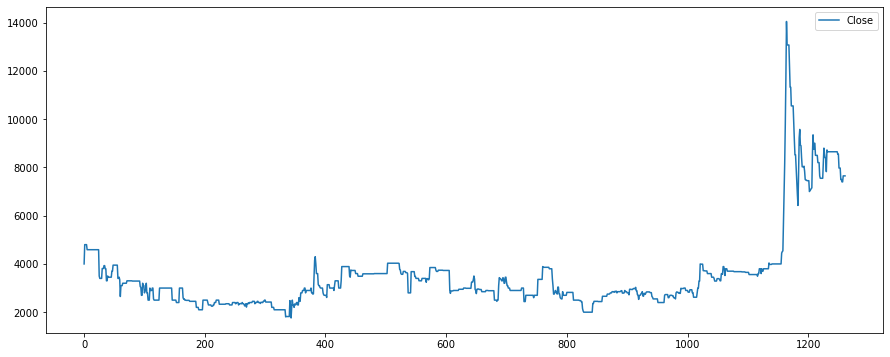

In [5]:
df.plot()
plt.show()

# Check Correlation and Autocorrelation

## ACF (AutoCorrelation Function)

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

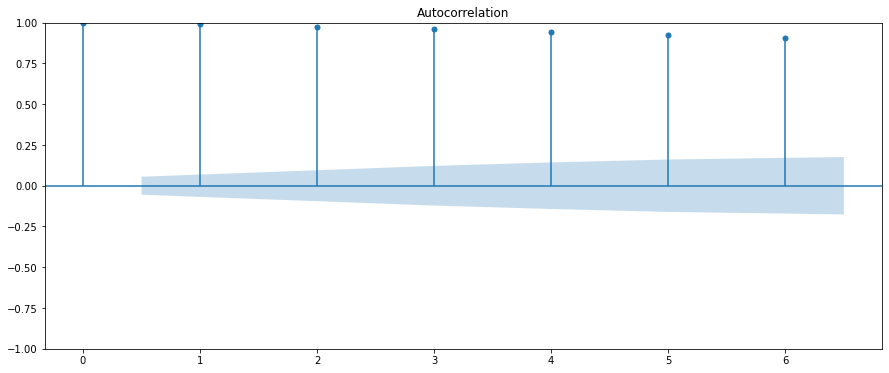

In [7]:
plot_acf(df, lags=6)
plt.show()

## PACF (Partial AutoCorrelation Function)

C:\Users\yoela\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


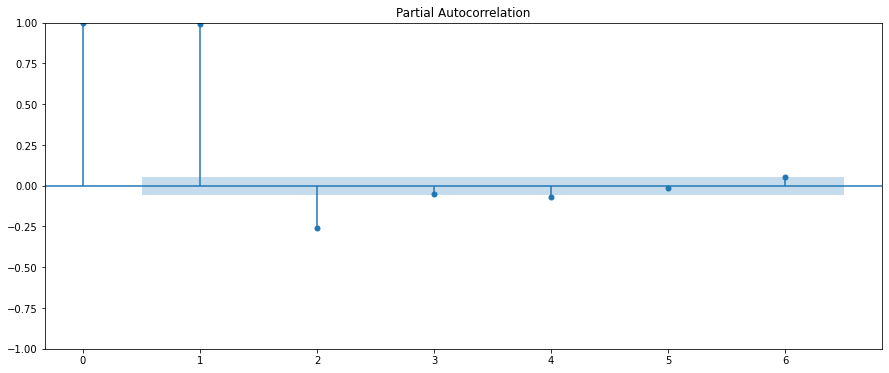

In [8]:
plot_pacf(df, lags=6)
plt.show()

 ## Train Test Split

In [9]:
n = int(len(df) * 0.8)
train = df.Close[:n]
test = df.Close[n:]


In [10]:
print(len(train))
print(len(test))

1009
253


## Training ARIMA model

In [21]:
model = sm.tsa.arima.ARIMA(train, order=(1,1,0))
result = model.fit()

In [22]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1009
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -6348.669
Date:                Fri, 07 Oct 2022   AIC                          12701.337
Time:                        15:00:55   BIC                          12711.168
Sample:                             0   HQIC                         12705.072
                               - 1009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0462      0.022      2.071      0.038       0.002       0.090
sigma2      1.731e+04    248.808     69.567      0.000    1.68e+04    1.78e+04
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [19]:
forecasts = model.forecast(4).tolist()
test_values = test.tolist()
for index in range(len(forecasts)):
  difference = forecasts[index] - test_values[index]
  print(forecasts[index], test_values[index], difference)


AttributeError: 'ARIMA' object has no attribute 'forecast'